# Sparse Hebbian Learning: basics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10

In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose, eta=.1, n_image=10, n_iter=100)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Mdn_N295008.jpg, Bdn_nat846.jpg, Bda_room170.jpg, Bda_room4.jpg, Hdn_land840.jpg, Hda_obj90.jpg, Mda_urb447.jpg, Hda_obj144.jpg, Bda_art923.jpg, Hda_obj25.jpg, 
Data is of shape : (1000, 144)done in 0.54s.

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  2.46716227694e-19
average energy of patches =  1.0
std of the average of individual patches =  1.19025016002e-17


Extracting data...Fda_art1317.jpg, Hda_obj450.jpg, Mda_art22.jpg, Fda_art1684.jpg, Hdn_N127068.jpg, Hda_obj51.jpg, Mda_urb902.jpg, Mda_art175.jpg, Bdn_land872.jpg, Bdn_text64.jpg, 
Data is of shape : (1000, 144)done in 0.52s.Learning the dictionary... Training on 1000 patches... Iteration   0 /   10 (elapsed time:   0s,  0.0mn)
Iteration   1 /   10 (elapsed time:   0s,  0.0mn)
Iteration   2 /   10 (elapsed time:   0s,  0.0mn)
Iteration   3 /   10 (elapsed time:   0s,  0.0mn)
Iteration   4 /   10 (elapsed time:   0s,  0.0mn)
Iteration   5 /   10 (elapsed time:   0s,  0.0mn)
Iteration   6 /   10 (elapsed time:   1s,  0.0mn)
Iteration   7 /   10 (elapsed time:   1s,  0.0mn)
Iteration   8 /   10 (elapsed time:   1s,  0.0mn)
Iteration   9 /   10 (elapsed time:   1s,  0.0mn)


/Users/lolo/pool/libs/numbers/scikit-learn-sparsenet/sklearn/decomposition/dict_learning.py:155: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


done in 1.85s.
Coding data... 

/Users/lolo/pool/libs/numbers/scikit-learn-sparsenet/sklearn/decomposition/dict_learning.py:155: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


done in 1.63s.


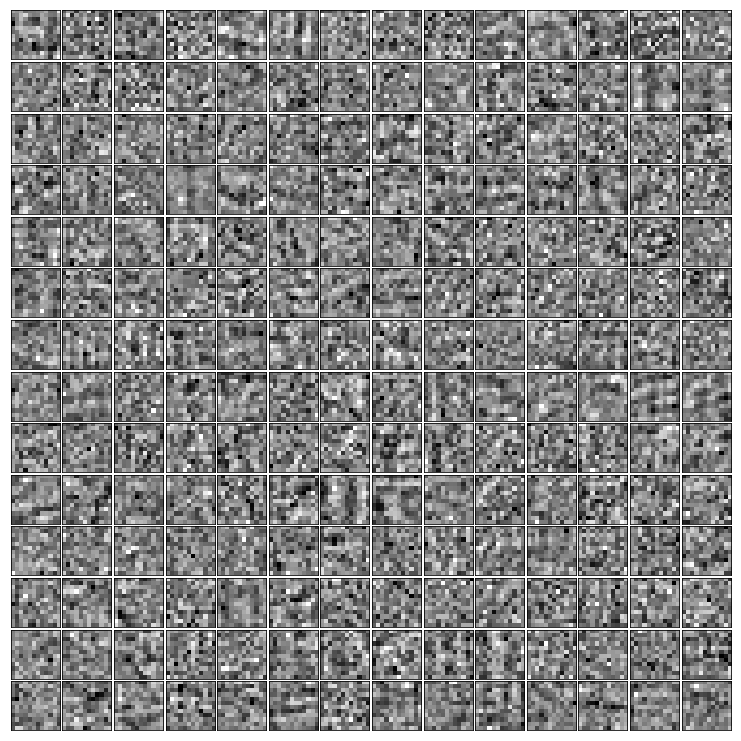

In [7]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)
patches = shl.code(data, dico)

In [8]:
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  0.00100568465537
average energy of patches =  0.687892622082
std of the average of individual patches =  0.0101987069773


In [9]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

/Users/lolo/pool/libs/numbers/scikit-learn-sparsenet/sklearn/decomposition/dict_learning.py:155: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


number of patches, size of patches =  (1000, 196)
average of patches =  0.00038117440986
average energy of patches =  0.56009149096
std of the average of individual patches =  0.0158335165011


In [10]:
V = dico.components_
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.     -1.2527  0.     -4.7198  0.      0.      0.      0.
 -2.9773 -1.9223  0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      2.1455  0.      0.
  0.      1.4168  0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      1.4259 -1.746   0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
 -1.7726  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      1.3704  0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      1.2992  0.      0.      0.      0.
  1.5207  0.      0.      0.      0.      0.      1.9248  0.      0.
 -1.4696  0.      0.      0.     -1.8729  0.      0.      0.      0.      0.
  0.      0.      0.      0.   

In [11]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  -0.00100568465537
average energy of patches =  0.599170861851
std of the average of individual patches =  0.0101987069773


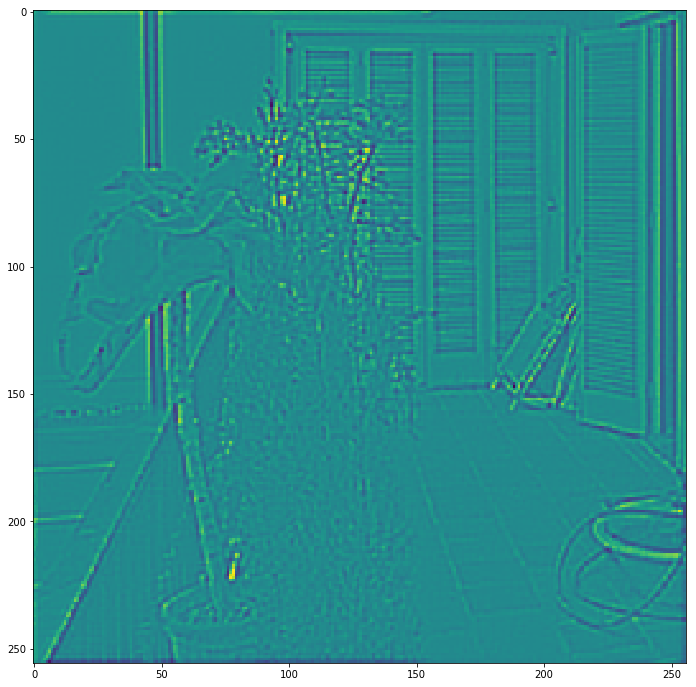

In [12]:
import imageio

image = imageio.imread('database/serre07_distractors/Bda_art1067.jpg')
#http://raw.githubusercontent.com/bicv/SLIP/master/database/yelmo512.png')
image = np.mean(image, axis=-1)
height, width = image.shape

from SLIP import Image

slip = Image({'N_X':height, 'N_Y':width, 
                                        'white_n_learning' : 0,
                                        'seed': None,
                                        'white_N' : .07,
                                        'white_N_0' : .0, # olshausen = 0.
                                        'white_f_0' : .4, # olshausen = 0.2
                                        'white_alpha' : 1.4,
                                        'white_steepness' : 4.,
                                        'do_mask':True})

image = slip.whitening(image)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image);

## Version used

In [13]:
%load_ext version_information
%version_information numpy

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.1.0
OS Darwin 16.3.0 x86_64 i386 64bit
numpy 1.12.0rc2
Thu Jan 05 11:40:11 2017 CET